In [1]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
import os

os.sys.path.append("../")

# Primary vertexing with different signal samples

Primary vertexing with different signal samples

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import seaborn as sns

hep.style.use("CMS")

In [4]:
!ls -lh /home/lucas/Documents/RA/data/

total 31G
-rw-rw-r-- 1 lucas lucas 299M Jan 17 17:11 DY_50k.parquet
-rw-rw-r-- 1 lucas lucas 672M Jan 17 17:11 DY_50k.pkl
-rw-rw-r-- 1 lucas lucas 884K Jan 17 17:11 DY_mc_50k.parquet
-rw-rw-r-- 1 lucas lucas 1.4M Jan 17 17:11 DY_mc_50k.pkl
-rw-rw-r-- 1 lucas lucas 3.2M Jan 17 17:11 DY_mc.parquet
-rw-rw-r-- 1 lucas lucas 5.8M Jan 17 17:11 DY_mc.pkl
-rw-rw-r-- 1 lucas lucas 1.8G Jan 17 17:11 DY.parquet
-rw-rw-r-- 1 lucas lucas 4.0G Jan 17 17:11 DY.pkl
-rw-r--r-- 1 lucas lucas 5.2G Jan 17 14:57 GTT_TrackNtuple_DY.root
-rw-r--r-- 1 lucas lucas 5.9G Jan 17 15:29 GTT_TrackNtuple_TT.root
-rw-r--r-- 1 lucas lucas 1.8G Jan 17 15:13 GTT_TrackNtuple_Zp.root
-rw-rw-r-- 1 lucas lucas 1.8K Jan 17 17:12 process_dataset.py
-rw-rw-r-- 1 lucas lucas  556 Oct  3 12:11 trk1-pt.bin
-rw-rw-r-- 1 lucas lucas  556 Oct  3 12:11 trk1-z0.bin
-rw-r--r-- 1 lucas lucas 168M Oct  3 12:01 trk_processed_25k.pkl
-rw-rw-r-- 1 lucas lucas 377M Jan 17 16:42 ttbar_50k.parquet
-rw-rw-r-- 1 lucas lucas 803M Jan 17 16:42 ttba

In [5]:
storage = "/home/lucas/Documents/RA/data/"
dy = pd.read_parquet(storage + "DY_50k.parquet")
dy_mc = pd.read_parquet(storage + "DY_mc_50k.parquet")

In [6]:
tt = pd.read_parquet(storage + "ttbar_50k.parquet")
tt_mc = pd.read_parquet(storage + "ttbar_mc_50k.parquet")

In [7]:
tt.head()

,event_number,track_number,trk_pt,trk_eta,trk_z0,trk_phi,trk_fake,trk_MVA1,trk_chi2_x,trk_chi2_y,trk_chi2dof,trk_chi2rphi,trk_chi2rz,trk_bendchi2,trk_MVA2,trk_nstub,trk_lhits,trk_dhits,trk_seed
0,0,0,3.321735,1.508114,2.285156,-0.322148,2,0.999705,3.449683,3.449683,0.431210,1.824624,1.625059,0.650641,0.0,6,111,1011,0
1,0,1,2.802182,1.816592,-10.957031,-0.262414,2,0.996890,4.947418,4.947418,0.618427,1.406616,3.540802,1.399517,0.0,6,11,1111,0
2,0,2,2.178730,0.647218,-3.632812,-0.083509,2,0.990228,11.213161,11.213161,1.401645,10.229476,0.983685,1.053935,0.0,6,111111,0,0
3,0,3,1.971232,1.026682,-1.406250,0.047079,2,0.996147,3.593802,3.593802,0.598967,1.705098,1.888704,0.702030,0.0,5,11111,0,0
4,0,4,1.974080,-1.409943,-1.582031,0.263590,2,0.998664,12.148260,12.148260,1.518533,6.264452,5.883808,1.077325,0.0,6,111,111,0


In [8]:
tt.drop(columns="trk_chi2_y", inplace=True)

In [9]:
tt.rename(columns={"trk_chi2_x": "trk_chi2"}, inplace=True)

In [10]:
zp = pd.read_parquet(storage + "Zp_50k.parquet")
zp_mc = pd.read_parquet(storage + "Zp_mc_50k.parquet")

In [11]:
zp_mc.head()

,event_number,track_number,pv_MC
0,0,0,-0.603286
1,1,0,0.597292
2,2,0,0.854938
3,3,0,5.964469
4,4,0,7.255724


In [12]:
dy.dropna(inplace=True)
zp.dropna(inplace=True)
tt.dropna(inplace=True)

In [13]:
tt["is_pv"] = 0
dy["is_pv"] = 0
zp["is_pv"] = 0

tt.loc[tt["trk_fake"] == 1, "is_pv"] = 1
dy.loc[dy["trk_fake"] == 1, "is_pv"] = 1
zp.loc[zp["trk_fake"] == 1, "is_pv"] = 1

## ttbar primary vertexing

In [14]:
from primaryvertexingtools import PrimaryVertexing, PerformanceMetrics

In [15]:
tt["entry"] = tt["event_number"]
tt["subentry"] = tt["track_number"]
tt.set_index(["entry", "subentry"], inplace=True)

In [16]:
tt_mc["entry"] = tt_mc["event_number"]
tt_mc["subentry"] = tt_mc["track_number"]
tt_mc.set_index(["entry", "subentry"], inplace=True)

In [17]:
tt_pv = PrimaryVertexing(
    {
        "track_data": tt,
        "truth_data": tt_mc,
        "fh_bins": np.linspace(-15, 15, 256),
        "test_run": True,
        "nevents_test": 2000,
        "rank_by_pt": False,
    }
)

Initialized Primary Vertexing setup


In [18]:
tt_pv.run_fh()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2001/2001 [00:00<00:00, 4473.47it/s]


Ran Fast Histo


In [19]:
tt_pv.run_dbscan(stat="median")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2001/2001 [00:06<00:00, 329.73it/s]

Ran DBSCAN with eps: 0.08, minPts: 2


In [20]:
tt_pv.run_batched_dbscan(rank_by_pt=True, top_pt_n=10, max_number_of_tracks=1665)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:57<00:00, 34.71it/s]


Ran Batched DBSCAN


In [21]:
tt_pm = PerformanceMetrics(tt_pv)

0.124622345
positive bias 0.037389338
negative bias -0.03410992
positive bias 0.03481006622314453
negative bias -0.031971752643585205


In [22]:
tt_pm.pv_efficiency((tt_pm.z0_gen - tt_pm.z0_reco_fh_cor), display=True)

72.81 %


In [23]:
tt_pm.pv_efficiency((tt_pm.z0_gen - tt_pm.z0_reco_db_cor), display=True)

74.71 %


In [24]:
tt_pm.pv_efficiency((tt_pm.z0_gen - tt_pm.z0_reco_bdb_cor), display=True)

78.66 %


In [54]:
tt_pm.pv_efficiency((tt_pm.z0_gen - tt_pm.z0_reco_fh), display=True)
tt_pm.pv_efficiency((tt_pm.z0_gen - tt_pm.z0_reco_db), display=True)
tt_pm.pv_efficiency((tt_pm.z0_gen - tt_pm.z0_reco_bdb), display=True)

53.77 %
72.21 %
75.06 %


/home/lucas/miniconda3/envs/db-clustering/lib/python3.8/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/home/lucas/miniconda3/envs/db-clustering/lib/python3.8/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/home/lucas/miniconda3/envs/db-clustering/lib/python3.8/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


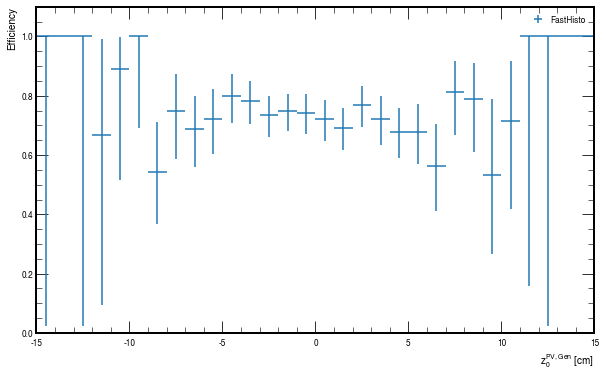

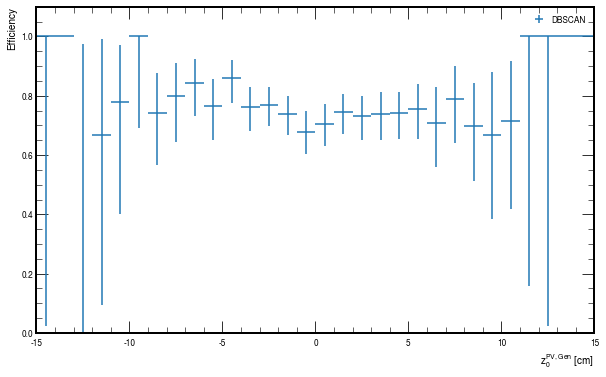

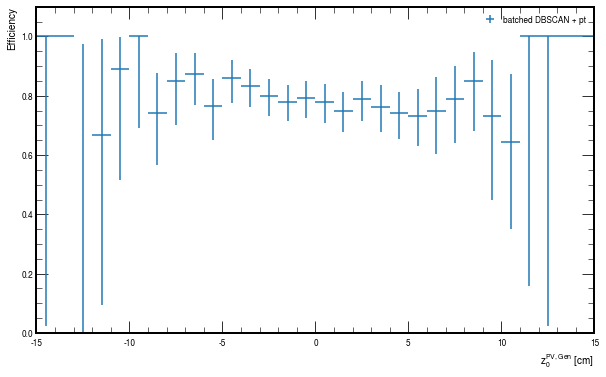

In [51]:
fh = tt_pm.plot_pv_efficiency_z0(
    z0_gen=tt_pm.z0_gen,
    z0_reco=tt_pm.z0_reco_fh_cor,
    label="FastHisto",
    figsize=(10, 6),
)
db = tt_pm.plot_pv_efficiency_z0(
    z0_gen=tt_pm.z0_gen,
    z0_reco=tt_pm.z0_reco_db_cor,
    label="DBSCAN",
    figsize=(10, 6),
)
bdb = tt_pm.plot_pv_efficiency_z0(
    z0_gen=tt_pm.z0_gen,
    z0_reco=tt_pm.z0_reco_bdb_cor,
    label="batched DBSCAN + pt",
    figsize=(10, 6),
)

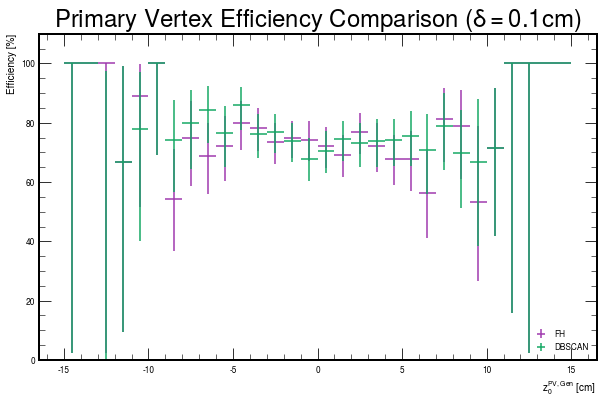

In [52]:
tt_pm.compare_efficiency_z0(fh, db, labels=["FH", "DBSCAN"], figsize=(10, 6))

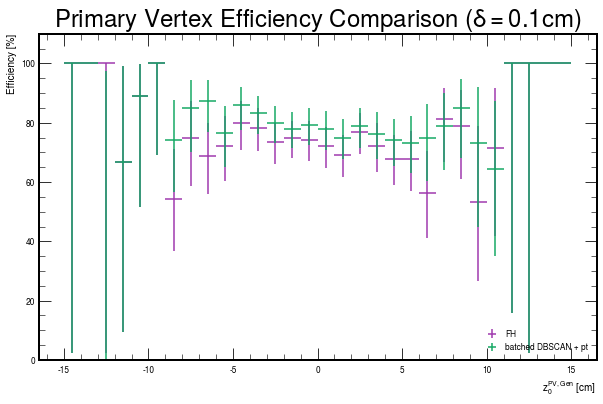

In [53]:
tt_pm.compare_efficiency_z0(
    fh, bdb, labels=["FH", "batched DBSCAN + pt"], figsize=(10, 6)
)

## Drell Yann Primary Vertexing

In [25]:
dy["entry"] = dy["event_number"]
dy["subentry"] = dy["track_number"]
dy.set_index(["entry", "subentry"], inplace=True)

In [26]:
dy_mc["entry"] = dy_mc["event_number"]
dy_mc["subentry"] = dy_mc["track_number"]
dy_mc.set_index(["entry", "subentry"], inplace=True)

In [69]:
dy_pv = PrimaryVertexing(
    {
        "track_data": dy,
        "truth_data": dy_mc,
        "fh_bins": np.linspace(-15, 15, 256),
        "test_run": True,
        "nevents_test": 5000,
        "rank_by_pt": False,
    }
)

Initialized Primary Vertexing setup


In [70]:
dy_pv.track_number.max()

266

In [75]:
dy_pv.run_fh()
dy_pv.run_dbscan(stat="median", eps=0.20)
dy_pv.run_batched_dbscan(
    rank_by_pt=True, top_pt_n=10, eps=0.20, max_number_of_tracks=300
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5001/5001 [00:01<00:00, 4905.05it/s]


Ran Fast Histo


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5001/5001 [00:14<00:00, 334.76it/s]


Ran DBSCAN with eps: 0.2, minPts: 2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:32<00:00, 155.82it/s]


Ran Batched DBSCAN


In [76]:
dy_pm = PerformanceMetrics(dy_pv)

0.2529254
positive bias 1.4712399
negative bias -1.7801353
positive bias 0.7866187691688538
negative bias -0.1445789337158203


In [77]:
dy_pm.pv_efficiency((dy_pm.z0_gen - dy_pm.z0_reco_fh_cor), display=True)
dy_pm.pv_efficiency((dy_pm.z0_gen - dy_pm.z0_reco_db_cor), display=True)
dy_pm.pv_efficiency((dy_pm.z0_gen - dy_pm.z0_reco_bdb_cor), display=True)

20.88 %
1.68 %
9.96 %


In [78]:
dy_pm.pv_efficiency((dy_pm.z0_gen - dy_pm.z0_reco_fh), display=True)
dy_pm.pv_efficiency((dy_pm.z0_gen - dy_pm.z0_reco_db), display=True)
dy_pm.pv_efficiency((dy_pm.z0_gen - dy_pm.z0_reco_bdb), display=True)

22.0 %
10.3 %
22.14 %


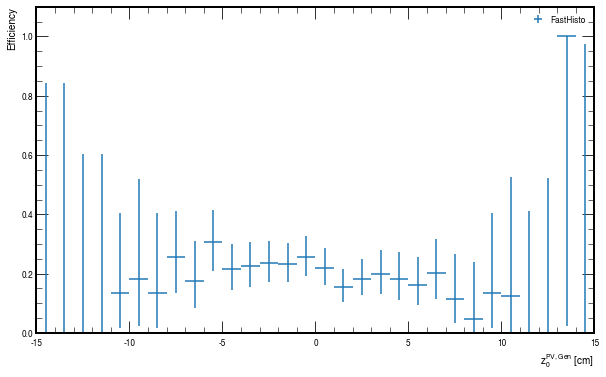

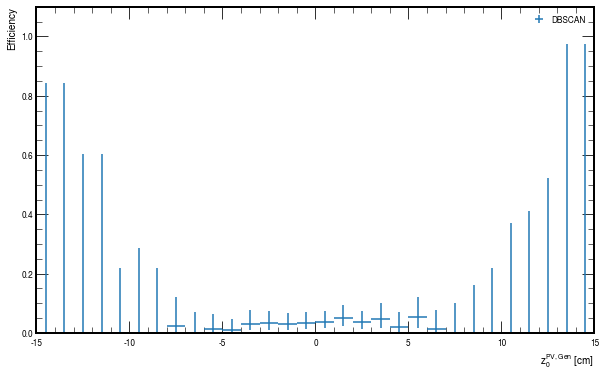

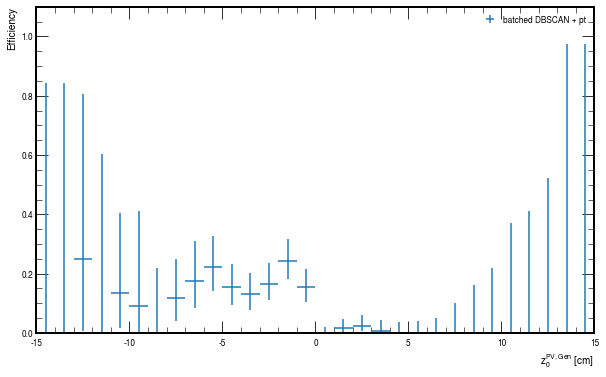

In [44]:
fh = dy_pm.plot_pv_efficiency_z0(
    z0_gen=dy_pm.z0_gen,
    z0_reco=dy_pm.z0_reco_fh_cor,
    label="FastHisto",
    figsize=(10, 6),
)
db = dy_pm.plot_pv_efficiency_z0(
    z0_gen=dy_pm.z0_gen,
    z0_reco=dy_pm.z0_reco_db_cor,
    label="DBSCAN",
    figsize=(10, 6),
)
bdb = dy_pm.plot_pv_efficiency_z0(
    z0_gen=dy_pm.z0_gen,
    z0_reco=dy_pm.z0_reco_bdb_cor,
    label="batched DBSCAN + pt",
    figsize=(10, 6),
)

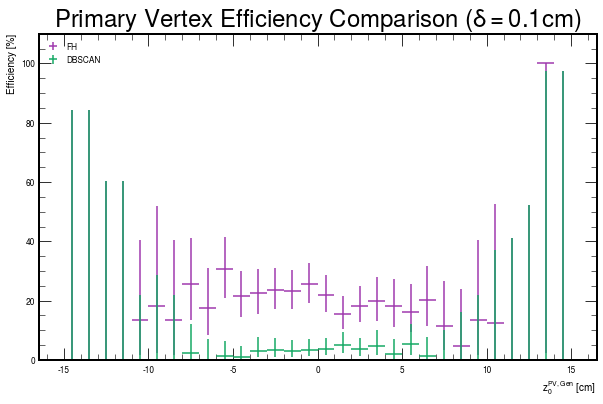

In [47]:
dy_pm.compare_efficiency_z0(fh, db, labels=["FH", "DBSCAN"], figsize=(10, 6))

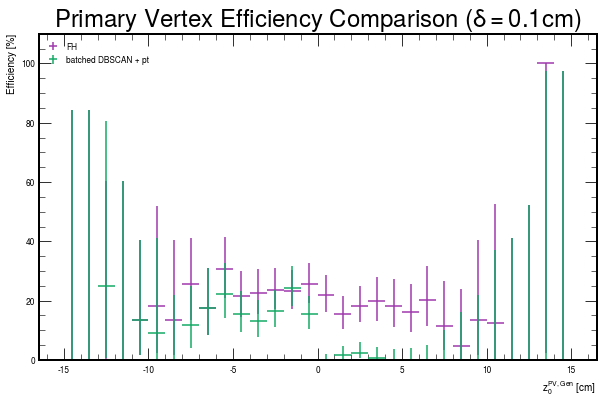

In [45]:
dy_pm.compare_efficiency_z0(
    fh, bdb, labels=["FH", "batched DBSCAN + pt"], figsize=(10, 6)
)

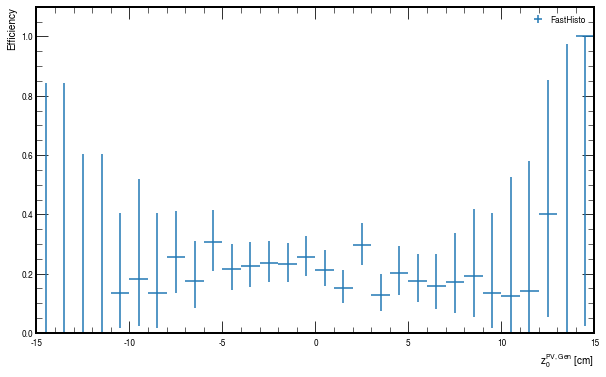

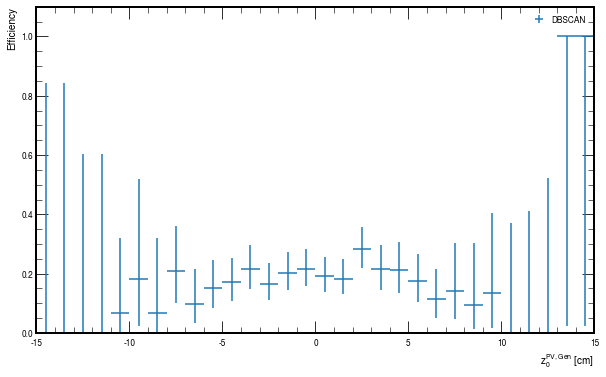

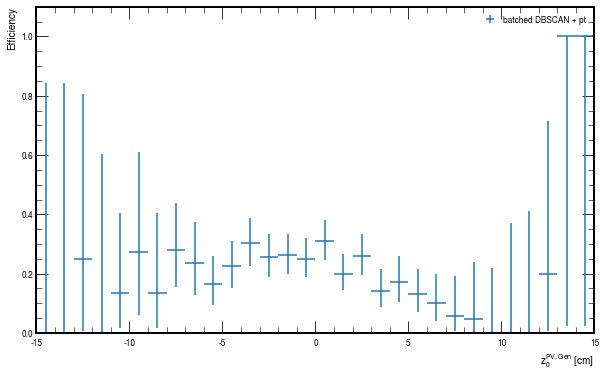

In [48]:
fh = dy_pm.plot_pv_efficiency_z0(
    z0_gen=dy_pm.z0_gen,
    z0_reco=dy_pm.z0_reco_fh,
    label="FastHisto",
    figsize=(10, 6),
)
db = dy_pm.plot_pv_efficiency_z0(
    z0_gen=dy_pm.z0_gen,
    z0_reco=dy_pm.z0_reco_db,
    label="DBSCAN",
    figsize=(10, 6),
)
bdb = dy_pm.plot_pv_efficiency_z0(
    z0_gen=dy_pm.z0_gen,
    z0_reco=dy_pm.z0_reco_bdb,
    label="batched DBSCAN + pt",
    figsize=(10, 6),
)

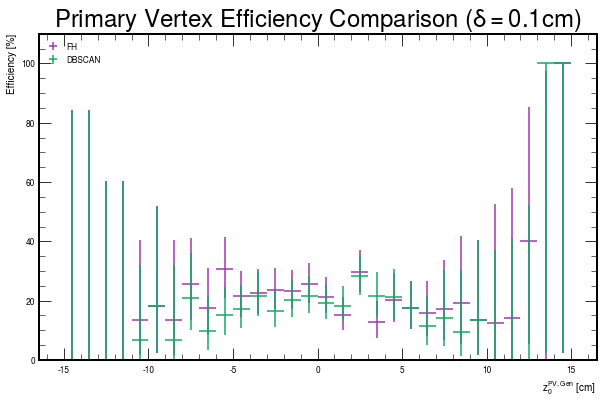

In [49]:
dy_pm.compare_efficiency_z0(fh, db, labels=["FH", "DBSCAN"], figsize=(10, 6))

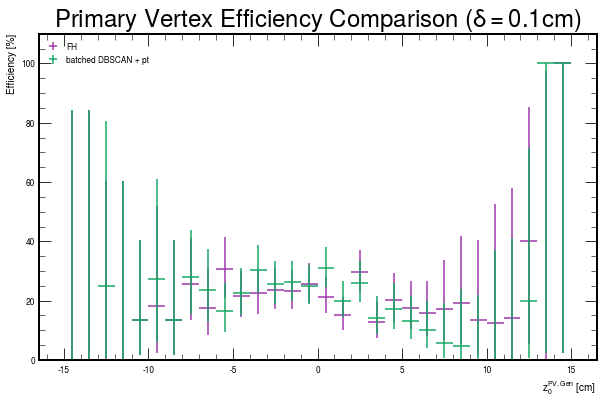

In [50]:
dy_pm.compare_efficiency_z0(
    fh, bdb, labels=["FH", "batched DBSCAN + pt"], figsize=(10, 6)
)

## Z' primary vertexing

In [32]:
zp["entry"] = zp["event_number"]
zp["subentry"] = zp["track_number"]
zp.set_index(["entry", "subentry"], inplace=True)

In [33]:
zp_mc["entry"] = zp_mc["event_number"]
zp_mc["subentry"] = zp_mc["track_number"]
zp_mc.set_index(["entry", "subentry"], inplace=True)

In [79]:
zp_pv = PrimaryVertexing(
    {
        "track_data": zp,
        "truth_data": zp_mc,
        "fh_bins": np.linspace(-15, 15, 256),
        "test_run": True,
        "nevents_test": 5000,
        "rank_by_pt": False,
    }
)

Initialized Primary Vertexing setup


In [80]:
zp.track_number.max()

312

In [129]:
# zp_pv.run_fh()
# zp_pv.run_dbscan(stat="median", eps=0.10)
zp_pv.run_batched_dbscan(
    rank_by_pt=True, eps=0.20, top_pt_n=25, max_number_of_tracks=320
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:08<00:00, 72.75it/s]


Ran Batched DBSCAN


In [130]:
zp_pm = PerformanceMetrics(zp_pv)

0.12856266
positive bias 0.048913002
negative bias -0.04821062
positive bias 0.056640446186065674
negative bias -0.051540255546569824


In [131]:
zp_pm.pv_efficiency((zp_pm.z0_gen - zp_pm.z0_reco_fh_cor), display=True)
zp_pm.pv_efficiency((zp_pm.z0_gen - zp_pm.z0_reco_db_cor), display=True)
zp_pm.pv_efficiency((zp_pm.z0_gen - zp_pm.z0_reco_bdb_cor), display=True)

52.83 %
49.93 %
45.63 %


In [132]:
zp_pm.pv_efficiency((zp_pm.z0_gen - zp_pm.z0_reco_fh), display=True)
zp_pm.pv_efficiency((zp_pm.z0_gen - zp_pm.z0_reco_db), display=True)
zp_pm.pv_efficiency((zp_pm.z0_gen - zp_pm.z0_reco_bdb), display=True)

43.13 %
48.45 %
44.63 %


/home/lucas/miniconda3/envs/db-clustering/lib/python3.8/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


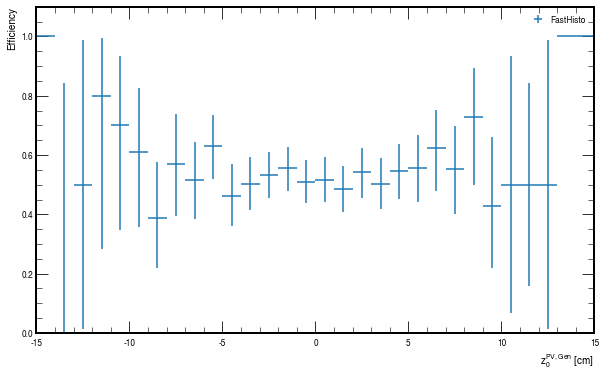

In [39]:
fh = zp_pm.plot_pv_efficiency_z0(
    z0_gen=zp_pm.z0_gen,
    z0_reco=zp_pm.z0_reco_fh_cor,
    label="FastHisto",
    figsize=(10, 6),
)

/home/lucas/miniconda3/envs/db-clustering/lib/python3.8/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


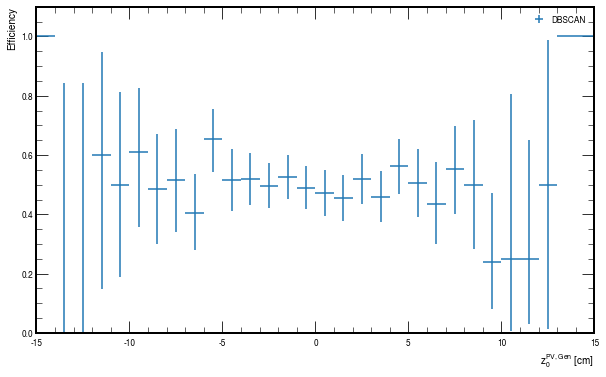

In [40]:
db = zp_pm.plot_pv_efficiency_z0(
    z0_gen=zp_pm.z0_gen,
    z0_reco=zp_pm.z0_reco_db_cor,
    label="DBSCAN",
    figsize=(10, 6),
)

/home/lucas/miniconda3/envs/db-clustering/lib/python3.8/site-packages/statsmodels/stats/proportion.py:89: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs


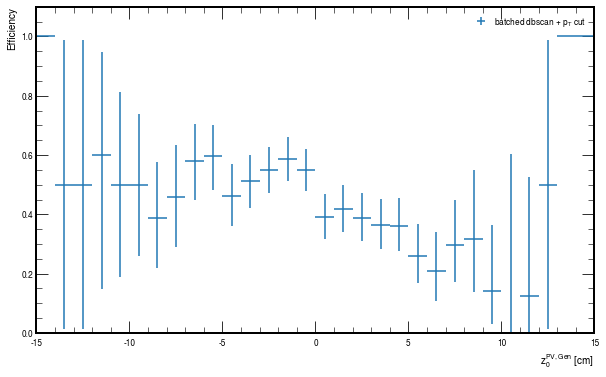

In [41]:
bdb = zp_pm.plot_pv_efficiency_z0(
    z0_gen=zp_pm.z0_gen,
    z0_reco=zp_pm.z0_reco_bdb_cor,
    label="batched dbscan + $p_T$ cut",
    figsize=(10, 6),
)

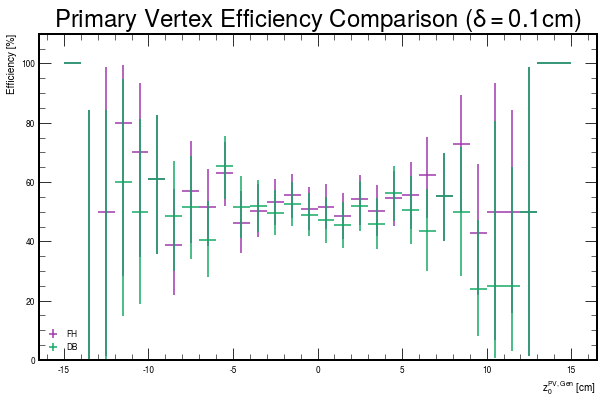

In [42]:
zp_pm.compare_efficiency_z0(fh, db, labels=["FH", "DB"], figsize=(10, 6))

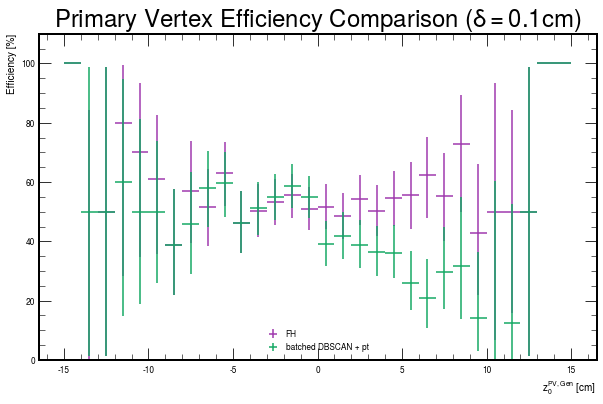

In [43]:
zp_pm.compare_efficiency_z0(
    fh, bdb, labels=["FH", "batched DBSCAN + pt"], figsize=(10, 6)
)